In [26]:
import os
import sys
import pandas as pd
sys.path.insert(0, os.path.abspath('../lib'))

import librosa
import matplotlib.pyplot as plt
import librosa

import numpy as np

from warnings import filterwarnings
filterwarnings('ignore')

# Reading and filtering the data
Let's start with reading the CSV file that contains the information about the mosquitos (source https://zenodo.org/records/4904800). Each row of the file represents one mosquito and contains information concerning that specific mosquito.

The data file contains lots of information about the mosquitoes. Since only the audio sample and the fed status of a mosquito are relevant to this problem, the other information like the species or the gender of a mosquito can eventually be discarded. However, the gender of the mosquito plays an important role in defining whether the mosquito is hungry for blood or not. This is because male mosquitoes do not feed on blood. Therefore all male mosquitoes can be defined as not hungry. When it comes to female mosquitoes, it is required, that they have to have their fed status defined.

As mentioned, the CSV file contains information about the audio sample of a specific mosquito. There is at least the identifier of the audio sample of each mosquito and the sampling rate of that sample. In problem it is required that the sampling rate is high enough. This is because mosquitoes can make higher sampling rates give more accurate information about the audio data. In this project, the accuracy is very much needed, since the differences in the hungry mosquitoes' and not hungry mosquitoes' sounds can be very small.

In [27]:
path_to_csv = "Replace this string with your path"

df = pd.read_csv(path_to_csv)
idx_female_eaten = np.logical_and(df['gender'] == 'Female', df['fed'] == 't')
idx_female_uneaten = np.logical_and(df['gender'] == 'Female', df['fed'] == 'f')
idx_male_all = np.logical_and(df['gender'] == 'Male', df['fed'].all())

idx_all = idx_male_all + idx_female_eaten + idx_female_uneaten


In [28]:
def select_hungry(status):
    """ Change the status fed='t' to 0 as in not hungry and fed='f' to 1 as in hungry. 
    For mosquiqtoes that have no fed status, that is, after filtering the data, the male mosquitoes,
    change the status to 0"""
    if status == 't':
        return 0
    elif status == 'f':
        return 1
    else:
        return 0

def choose_mosquitos(status):
    """ Pick around 1/8 of the mosquitoes that are not fed"""
    if status == 'f':
        random = np.random.random()
        if random < 0.18:
            return True
        return False
    return True

def is_mosquito(type):
    """ Check if the sound is mosquito"""
    if type == 'mosquito':
        return True
    return False

def is_high_rate(sample_rate):
    """ Check if the sample rate is 44100 Hz"""
    if sample_rate == 44100:
        return True
    return False


df_all = df.to_numpy()
mosquitoes = []
for idx in range(len(idx_all)):
    if idx_all[idx] == True:
        fed_status = df_all[idx, 8]
        sound_type = df_all[idx, 5]
        sample_rate = df_all[idx, 3]
        if not is_mosquito(sound_type):
            continue
        if not is_high_rate(sample_rate):
            continue
        if not choose_mosquitos(fed_status):
            continue
        new_fed_status = select_hungry(fed_status)
        df_all[idx, 8] = new_fed_status
        mosquitoes.append(df_all[idx, :])

df_mosquitoes = pd.DataFrame(mosquitoes, columns=df.columns)
df_mosquitoes.head(5000)


,id,length,name,sample_rate,record_datetime,sound_type,species,gender,fed,plurality,age,method,mic_type,device_type,country,district,province,place,location_type
0,221149,2.560000,IFA_17_26_666.wav,44100,30-01-20 00:00,mosquito,an arabiensis,Female,1,Single,NaN,HBN,telinga,tascam,Tanzania,Kilombero District,Morogoro,Ifakara,cup
1,221121,2.560000,IFA_17_27_667.wav,44100,30-01-20 00:00,mosquito,ma uniformis,Female,1,Single,NaN,HBN,telinga,tascam,Tanzania,Kilombero District,Morogoro,Ifakara,cup
2,221144,2.560000,IFA_17_28_668.wav,44100,30-01-20 00:00,mosquito,culex pipiens complex,Female,1,Single,NaN,HBN,telinga,tascam,Tanzania,Kilombero District,Morogoro,Ifakara,cup
3,221140,2.560000,IFA_17_30_670.wav,44100,30-01-20 00:00,mosquito,ma africanus,Female,1,Single,NaN,HBN,telinga,tascam,Tanzania,Kilombero District,Morogoro,Ifakara,cup
4,221132,2.560000,IFA_17_35_675.wav,44100,30-01-20 00:00,mosquito,culex pipiens complex,Female,1,Single,NaN,HBN,telinga,tascam,Tanzania,Kilombero District,Morogoro,Ifakara,cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,3562,6.083093,#988-1001.wav,44100,01-07-18 12:00,mosquito,an harrisoni,Female,0,Single,NaN,ABN,telinga,olympus,Thailand,Sai Yok District,Kanchanaburi Province,field site near Pu Teuy Village,cup
848,3556,6.719908,#988-1001.wav,44100,01-07-18 12:00,mosquito,an maculatus,Female,0,Single,NaN,ABN,telinga,olympus,Thailand,Sai Yok District,Kanchanaburi Province,field site near Pu Teuy Village,cup
849,3553,6.128580,#988-1001.wav,44100,01-07-18 12:00,mosquito,an maculatus,Female,0,Single,NaN,ABN,telinga,olympus,Thailand,Sai Yok District,Kanchanaburi Province,field site near Pu Teuy Village,cup
850,3561,11.614280,#988-1001.wav,44100,01-07-18 12:00,mosquito,an harrisoni,Female,0,Single,NaN,ABN,telinga,olympus,Thailand,Sai Yok District,Kanchanaburi Province,field site near Pu Teuy Village,cup


# Finding the audio recording for each mosquito
The audio recordings, that originally are from an open access Zenodo website (https://zenodo.org/records/4904800, "HumBugDB: A Large-scale Acoustic Mosquito Dataset"), come in 5 different folders whose names are 'humbugdb_neurips_2021_i', where i = 0, 1, 2, 3, 4. For each mosquito, the folder that contains that mosquito's audio recording needs to be found. The audio sample for each mosquito is searched based on the sample identifier defined on the CSV file.

In [29]:
def match_file(sample_number, rate=44100):
    """ Find the correct folder and match the sample number to the file name"""
    file_name = "Replace this string with your path"
    folder_number = 0
    while folder_number < 5:
        try:
            filename = f"{file_name}{folder_number}/{sample_number}.wav"
            return librosa.load(filename, sr=rate)
        except FileNotFoundError:
            folder_number += 1
            continue


In [30]:
def match_mosquito_to_audio(mosquito):
    """ Match audio to mosquito"""
    sample_number = mosquito[0]
    signal, _ = match_file(sample_number) # returs an audio-timeseries
    signal = librosa.util.normalize(signal)
    return signal

# Processing the audio data
Without going into details, the audio data is transformed into frequency domain with short time Fourier transform (STFT). Then the frequencies of each audio sample are divided into 129 frequency bins. Bins are evenly spaced and each bin contains the amplitudes of , that is, the transformed recording of each mosquito is divided into frequency bins. Finally, the amplitudes of each mosquito of each bin are summed (within that bin), and this is the final data.

In [31]:
from scipy import signal
def freq_time_amplitude(signal_data):
    """ Calculate the frequency, time and amplitude of the signal"""
    freq, time, ampl = signal.stft(signal_data)
    return freq, time, ampl

# trying with one mosquito
signal_data = match_mosquito_to_audio(df_mosquitoes.to_numpy()[700])
frequency_bins, _, amplitudes_i = freq_time_amplitude(signal_data)
amplitudes_0 = np.abs(amplitudes_i)

#print(np.abs(amplitudes[0]))
print(np.abs(amplitudes_0).shape)

print(frequency_bins.shape)
#print(amplitudes.shape)

print(frequency_bins)


(129, 3438)
(129,)
[0.         0.00390625 0.0078125  0.01171875 0.015625   0.01953125
 0.0234375  0.02734375 0.03125    0.03515625 0.0390625  0.04296875
 0.046875   0.05078125 0.0546875  0.05859375 0.0625     0.06640625
 0.0703125  0.07421875 0.078125   0.08203125 0.0859375  0.08984375
 0.09375    0.09765625 0.1015625  0.10546875 0.109375   0.11328125
 0.1171875  0.12109375 0.125      0.12890625 0.1328125  0.13671875
 0.140625   0.14453125 0.1484375  0.15234375 0.15625    0.16015625
 0.1640625  0.16796875 0.171875   0.17578125 0.1796875  0.18359375
 0.1875     0.19140625 0.1953125  0.19921875 0.203125   0.20703125
 0.2109375  0.21484375 0.21875    0.22265625 0.2265625  0.23046875
 0.234375   0.23828125 0.2421875  0.24609375 0.25       0.25390625
 0.2578125  0.26171875 0.265625   0.26953125 0.2734375  0.27734375
 0.28125    0.28515625 0.2890625  0.29296875 0.296875   0.30078125
 0.3046875  0.30859375 0.3125     0.31640625 0.3203125  0.32421875
 0.328125   0.33203125 0.3359375  0.3398437

In [32]:
# create signal data
mosquitoes = df_mosquitoes.to_numpy()

amplitudes = []
for mosquito in mosquitoes:
    signal_data = match_mosquito_to_audio(mosquito)
    freq, _, ampl = freq_time_amplitude(signal_data)
    amplitudes.append(np.abs(ampl))


In [33]:
print(len(amplitudes[700]))
print(len(amplitudes[700][120]))

data = []
for i in range(len(mosquitoes)):
    mosquito = mosquitoes[i]
    fed = mosquito[8]
    ampl = amplitudes[i]
    ampls_i = []
    for j in range(len(ampl)):
        ampls_i.append(ampl[j][:279]) # because the shortest sample is 279
    data.append([fed, ampls_i])


129
3438


In [34]:
# create dataframe where each row is a mosquito
df_data = pd.DataFrame(data, columns=['fed', 'amplitudes'])

# extract amplitudes to separate columns, there should be 129 columns
df_amplitudes = pd.DataFrame(df_data['amplitudes'].to_list(), columns=[f'amp_{i}' for i in range(129)])

# combine fed and amplitudes
df_data = pd.concat([df_data['fed'], df_amplitudes], axis=1)
df_data.head(5000)

,fed,amp_0,amp_1,amp_2,amp_3,amp_4,amp_5,amp_6,amp_7,amp_8,...,amp_119,amp_120,amp_121,amp_122,amp_123,amp_124,amp_125,amp_126,amp_127,amp_128
0,1,"[0.059655704, 0.0024196545, 0.06782602, 0.0218...","[0.05403754, 0.020607565, 0.04957653, 0.038164...","[0.042279486, 0.018202916, 0.026441062, 0.0152...","[0.031376097, 0.0104587665, 0.017273866, 0.014...","[0.02058903, 0.0051445873, 0.010371189, 0.0068...","[0.012191049, 0.0093667675, 0.004021329, 0.003...","[0.010626723, 0.006244179, 0.002974009, 0.0031...","[0.007230668, 0.0020070705, 0.0005631704, 0.00...","[0.004117359, 0.0047416957, 0.00016696833, 0.0...",...,"[0.00061378244, 0.0009018994, 0.0007897345, 0....","[0.0008446586, 0.00031612054, 0.00034799954, 0...","[0.0010219808, 0.0001948358, 0.00013730653, 0....","[0.0010588341, 0.0002409253, 0.0004549643, 0.0...","[0.0008162513, 0.00038530675, 0.00056409056, 0...","[0.00037741943, 0.00066699967, 0.00020679626, ...","[0.0005697928, 0.0010420104, 0.00033052271, 0....","[0.0005496278, 0.0011832758, 0.00039370367, 0....","[0.0004664991, 0.0008487678, 0.00041466026, 0....","[0.0006397082, 0.00027396978, 0.00043213437, 0..."
1,1,"[0.022024665, 0.03355427, 0.13671055, 0.147698...","[0.019459544, 0.033478096, 0.0768569, 0.076644...","[0.012815454, 0.007534696, 0.0070697563, 0.011...","[0.005932316, 0.011851524, 0.0061454955, 0.009...","[0.0025928896, 0.0064451913, 0.004871912, 0.00...","[0.0049026846, 0.014573952, 0.014181925, 0.012...","[0.0067027127, 0.010358327, 0.011249012, 0.009...","[0.004429466, 0.004052435, 0.0032328037, 0.003...","[0.0019803639, 0.0037917783, 0.004744636, 0.00...",...,"[0.00015431072, 0.00073232985, 0.0011002058, 0...","[0.0004238121, 0.00042112067, 0.0011370067, 8....","[0.0006320978, 0.00063333765, 0.0006663509, 0....","[0.00046285128, 0.00086336164, 0.00033367475, ...","[0.000102200785, 0.0007504425, 0.00026734668, ...","[8.198165e-05, 0.00085256225, 0.00038237753, 0...","[0.00025687905, 0.00084361003, 0.0007067445, 0...","[0.0005086039, 0.00033365886, 0.00083401625, 0...","[0.000607353, 0.0001630016, 0.0010420847, 0.00...","[0.0006124584, 2.374709e-05, 0.00074515777, 0...."
2,1,"[0.023392126, 0.034009077, 0.032966997, 0.0376...","[0.019537667, 0.016177425, 0.017266814, 0.0214...","[0.011327843, 0.0029290721, 0.003062399, 0.003...","[0.0051043183, 0.0010148761, 0.0022148031, 0.0...","[0.0025530646, 0.0013732587, 0.0017260395, 0.0...","[0.0013218933, 0.00034021158, 0.0006002516, 0....","[0.0013446786, 0.0004674044, 0.00019017591, 0....","[0.0011313116, 0.00018300535, 0.00026714467, 0...","[0.0009917851, 0.00027356524, 0.00021720977, 0...",...,"[0.0001594356, 7.168123e-05, 0.00010922391, 0....","[0.00019556681, 6.975382e-05, 0.00018733575, 6...","[0.00020530101, 2.1220247e-05, 0.00016016423, ...","[0.00019327666, 5.5203564e-05, 5.7168778e-05, ...","[0.00012806953, 0.00014549795, 2.8272822e-05, ...","[1.1031195e-05, 0.000115369425, 7.580311e-05, ...","[8.718978e-05, 7.072784e-05, 0.00010350922, 7....","[0.00010517103, 4.3380052e-05, 9.038971e-05, 0...","[6.64758e-05, 1.2410036e-05, 7.3881565e-05, 0....","[3.5067613e-05, 1.8039458e-05, 8.010157e-05, 6..."
3,1,"[0.025994558, 0.06610439, 0.07167261, 0.097534...","[0.021388538, 0.035175946, 0.03293344, 0.05297...","[0.011773183, 0.004288783, 0.0052551012, 0.006...","[0.0049081272, 0.003774877, 0.002152172, 0.002...","[0.0022981858, 0.002286167, 0.0011986586, 0.00...","[0.0015128441, 0.00035159476, 0.00043374483, 0...","[0.0016822821, 0.00045399443, 0.00022728504, 0...","[0.0011954295, 0.0002810396, 0.0003973858, 0.0...","[0.0011056808, 0.0003834021, 0.00088156195, 0....",...,"[0.00010639012, 0.00017278374, 0.00017398223, ...","[0.000105011, 0.00012935205, 0.000102378, 0.00...","[4.2488442e-05, 0.00013643154, 0.00011690814, ...","[5.4262582e-05, 0.00015303321, 0.00023053201, ...","[2.3016642e-05, 0.0003226445, 0.00018060248, 4...","[0.00012140247, 0.00036038423, 0.00012315584, ...","[0.00018765002, 0.00021573942, 0.00015251337, ...","[0.00015967066, 5.398649e-05

In [35]:
def find_min_len(df_data):
    """ Find the smallest length of amplitudes amp_0 of all mosquitoes"""
    min_len = len(df_data['amp_0'].to_list()[0])
    for i in range(len(df_data)):
        if len(df_data['amp_0'].to_list()[i]) < min_len:
            min_len = len(df_data['amp_0'].to_list()[i])

    print(min_len)
    return min_len

def find_max_len(df_data):
    """ Find the largest length of amplitudes amp_0 of all mosquitoes"""
    max_len = len(df_data['amp_0'].to_list()[0])
    for i in range(len(df_data)):
        if len(df_data['amp_0'].to_list()[i]) > max_len:
            max_len = len(df_data['amp_0'].to_list()[i])

    print(max_len)
    return max_len

# checking that all amplitudes are the same length
find_max_len(df_data)
find_min_len(df_data)

279
279


279

In [36]:
def sum_amplitudes(df_data):
    """ Sum all amplitudes of each mosquito of each frequency bin and replace the list in that column on that row with the sum"""
    for i in range(len(df_data)):
        for j in range(129):
            df_data[f'amp_{j}'][i] = sum(df_data[f'amp_{j}'][i])
    return df_data

df_data = sum_amplitudes(df_data)
df_data.head(5000)

,fed,amp_0,amp_1,amp_2,amp_3,amp_4,amp_5,amp_6,amp_7,amp_8,...,amp_119,amp_120,amp_121,amp_122,amp_123,amp_124,amp_125,amp_126,amp_127,amp_128
0,1,62.374219,37.634898,16.034463,12.265201,4.045973,1.618736,0.938918,0.593451,0.888947,...,0.180631,0.181918,0.181921,0.176109,0.178318,0.171212,0.174768,0.174232,0.165645,0.1498
1,1,57.177769,29.719738,5.099455,3.082649,1.680543,2.47253,2.084706,0.800974,1.161803,...,0.133785,0.140302,0.133349,0.13181,0.131611,0.128416,0.12741,0.129117,0.126614,0.115386
2,1,12.282126,6.433541,0.77723,0.373003,0.304283,0.240182,0.134031,0.11397,0.097694,...,0.0255,0.024853,0.025007,0.024326,0.023981,0.024177,0.0236,0.024351,0.02518,0.022737
3,1,20.148141,10.902762,1.376294,0.793187,2.003597,2.367263,0.757822,0.452477,0.350424,...,0.047518,0.046867,0.046628,0.04667,0.046593,0.044687,0.045524,0.043319,0.044505,0.041855
4,1,35.424612,19.938878,3.57642,3.355452,2.347195,1.004703,1.579613,1.492195,0.577974,...,0.111816,0.1092,0.110888,0.115327,0.107264,0.105652,0.104922,0.105706,0.101369,0.095601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,0,55.766973,30.974945,4.215061,2.318454,1.273809,2.435592,3.149804,1.468714,0.951838,...,0.253162,0.266205,0.25373,0.255643,0.267407,0.26545,0.266526,0.26327,0.255245,0.222973
848,0,28.852945,15.612535,2.1085,1.307426,1.237164,0.966111,1.25949,1.194141,0.482665,...,0.136342,0.138578,0.13759,0.137237,0.143024,0.143748,0.13969,0.147695,0.148191,0.129043
849,0,40.333896,23.364938,5.204639,4.023744,2.291272,2.139821,6.290301,6.412638,1.977677,...,0.341236,0.327121,0.349824,0.34456,0.352192,0.358038,0.352288,0.341887,0.341545,0.302261
850,0,24.734195,14.300644,2.201731,1.691134,0.91867,2.435908,2.312656,0.685506,0.750669,...,0.134318,0.136329,0.143201,0.141143,0.139221,0.140275,0.14543,0.149533,0.143023,0.122127


# Logistic regression with the initial data

## Split the data into training, testing and validation sets
The frequency bins are used as features and hunger status (fed) is used as the label. The data is split into training, testing and validation sets as follows: 75% of the data goes to training, 25% * 75% ≈ 19% goes to testing and 25% * 25% ≈ 6% goes to validation.

In [37]:
from sklearn.model_selection import train_test_split

# create features and labels
X = df_data.drop('fed', axis=1)
y = df_data['fed']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=10)


## Fitting the model and analyzing the results
- First the model is fitted to the training data.
- Secondly the model is used to predict the labels on the training set. From this, we get the training accuracy of this model.
- Thirdly the model is used to predict the labels on the testing set. From this, we get the testing accuracy of this model.
- Forthly the model is used to predict the labels on the validation set. From this, we get the validation accuracy of this model.

The results for all sets, are visualized in the confusion matrices below.

129 components training accuracy: 0.8857589984350548


129 components testing accuracy: 0.8301886792452831


129 features validation accuracy: 0.9259259259259259


<Axes: title={'center': 'Validation set'}>

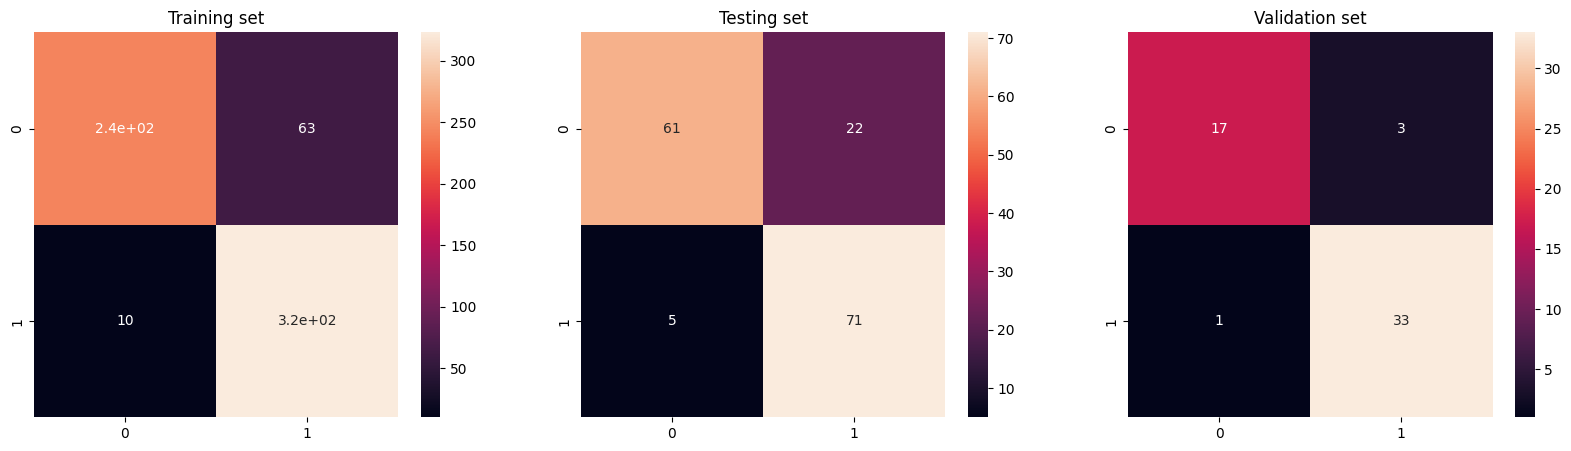

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import seaborn as sns
import matplotlib.pyplot as plt


# train model with logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# set up subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].set_title('Training set')
axes[1].set_title('Testing set')
axes[2].set_title('Validation set')

# evaluate model with accuracy score and log loss on the training
y_pred = model.predict(X_train)
print(f"129 components training accuracy: {accuracy_score(y_train, y_pred)}")
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, ax=axes[0])
print('\n')

# evaluate model with accuracy score and log loss on the testing
y_pred = model.predict(X_test)
print(f"129 components testing accuracy: {accuracy_score(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=axes[1])
print('\n')

# evaluate model with accuracy score and log loss on the validation
y_pred = model.predict(X_val)
print(f"129 features validation accuracy: {accuracy_score(y_val, y_pred)}")
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, ax=axes[2])


Since the validation set is what we are most interested in, let's calculate some more metrics for it.

In [39]:
# calculate several metrics for the logistic regression
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.92      0.97      0.94        34

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



Lastly, let's analyze the model fit with the loss function. In case on logistic regression, the choise for the loss function is pretty obvious, that is, the loss function used is logistic loss function.

In [40]:
# evaluate model with logistic loss on the training
y_pred = model.predict_proba(X_train)
print(f"129 components training loss: {log_loss(y_train, y_pred)}")
print('\n')

# evaluate model with logistic loss on the testing
y_pred = model.predict_proba(X_test)
print(f"129 components testing loss: {log_loss(y_test, y_pred)}")
print('\n')

# evaluate model with logistic loss on the validation
y_pred = model.predict_proba(X_val)
print(f"129 components validation loss: {log_loss(y_val, y_pred)}")


129 components training loss: 0.3684828541819537


129 components testing loss: 0.5080727682994227


129 components validation loss: 0.3332024107149462


# PCA (Principal Component Analysis) to reduce features
## Finding the optimal amout of components
Here, the amount of the features is tried to be reduced with PCA. Firstly, several different amounts of features is tried for the model. Based on these results of accuracy, the amount of components, that gives the highest accuracy, is chosen.

In [41]:
# PCA feature selection to improve the model
from sklearn.decomposition import PCA
# try with several different numbers of components
highest_acc_index = 0
highest_train_acc = 0
highest_test_acc = 0
highest_val_acc = 0
for i in range(2, 130, 1):
    # fit PCA to training data
    pca = PCA(n_components=i)
    pca.fit(X_train)

    # transform training, testing and validation data
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_val_pca = pca.transform(X_val)

    # train model with PCA
    model = LogisticRegression()
    model.fit(X_train_pca, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train_pca))
    test_acc = accuracy_score(y_test, model.predict(X_test_pca))
    val_acc = accuracy_score(y_val, model.predict(X_val_pca)) 
    
    # evaluate model with PCA
    # print(f"{i} training accuracy: {train_acc}, "
    #      f"testing accuracy: {test_acc}, "
    #      f"validation accuracy: {test_acc} and "
    #      f"validation loss: {log_loss(y_val, model.predict_proba(X_val_pca))}\n")
    
    # save the highest accuracy and the index of the highest accuracy
    if val_acc >= highest_val_acc:
        if test_acc >= highest_test_acc:
            if train_acc > highest_train_acc and abs(train_acc - val_acc) < 0.10:
                highest_train_acc = train_acc
                highest_test_acc = test_acc
                highest_acc_index = i
                highest_val_acc = val_acc

print(f"Highest validation accuracy: {highest_val_acc} with {highest_acc_index} components")


Highest validation accuracy: 0.9259259259259259 with 57 components


Based on the previous results, create PCA model with n components and apply it with the training data. Here, the results of PCA are also visualized by the graph that shows the explained variance ration on y-axis and the principal components on x-axis.

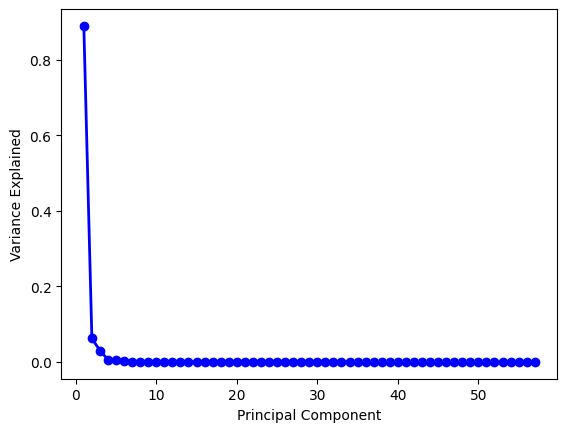

In [42]:
# select n components
n = highest_acc_index
pca = PCA(n_components=n)

# fit PCA to training data
pca.fit(X_train)

# visualize the variance explained by each component
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## Applying the feature selection on the data
Now to reduce dimensionality of the data, the data has to be transformed so that it matches the features selected with PCA. Here, the data is transformed and the features (and the label) are then visualized with a dataframe that shows the features selected and both the explained variance ratio and the importance of that particular feature (or label).

In [43]:
# transform training, testing and validation data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

# save the columns that are selected
selected_columns = []
for i in pca.components_:
    selected_columns.append(df_data.columns[np.argmax(i)])

# create and show a table of the 50 selected columns
df_selected = pd.DataFrame(selected_columns, columns=['selected columns'])

# add a column to dataframe with the explained variance ratio
df_selected['explained variance ratio'] = pca.explained_variance_ratio_

# add a column to dataframe indicating how important the column is
df_selected['importance'] = df_selected['explained variance ratio'] / df_selected['explained variance ratio'].sum()
df_selected.head(highest_acc_index)

,selected columns,explained variance ratio,importance
0,fed,8.897927e-01,8.897935e-01
1,amp_5,6.230680e-02,6.230686e-02
2,amp_1,2.999773e-02,2.999776e-02
3,amp_0,6.228555e-03,6.228560e-03
4,amp_0,4.596407e-03,4.596411e-03
5,amp_7,2.264452e-03,2.264454e-03
6,amp_3,1.114032e-03,1.114033e-03
7,amp_6,9.738922e-04,9.738931e-04
8,amp_7,6.037565e-04,6.037571e-04
9,amp_1,5.669985e-04,5.669991e-04


# Logistic regression with the reduced features
- First the model is fitted to the reduced training data.
- Secondly the model is used to predict the labels on the reduced training set. From this, we get the training accuracy of this model.
- Thirdly the model is used to predict the labels on the reduced testing set. From this, we get the testing accuracy of this model.
- Forthly the model is used to predict the labels on the reduced validation set. From this, we get the validation accuracy of this model.

The results for all sets, are visualized in the confusion matrices below.


57 features training accuracy: 0.8841940532081377


57 features testing accuracy: 0.8301886792452831


57 features validation accuracy: 0.9259259259259259


<Axes: title={'center': 'Validation set'}>

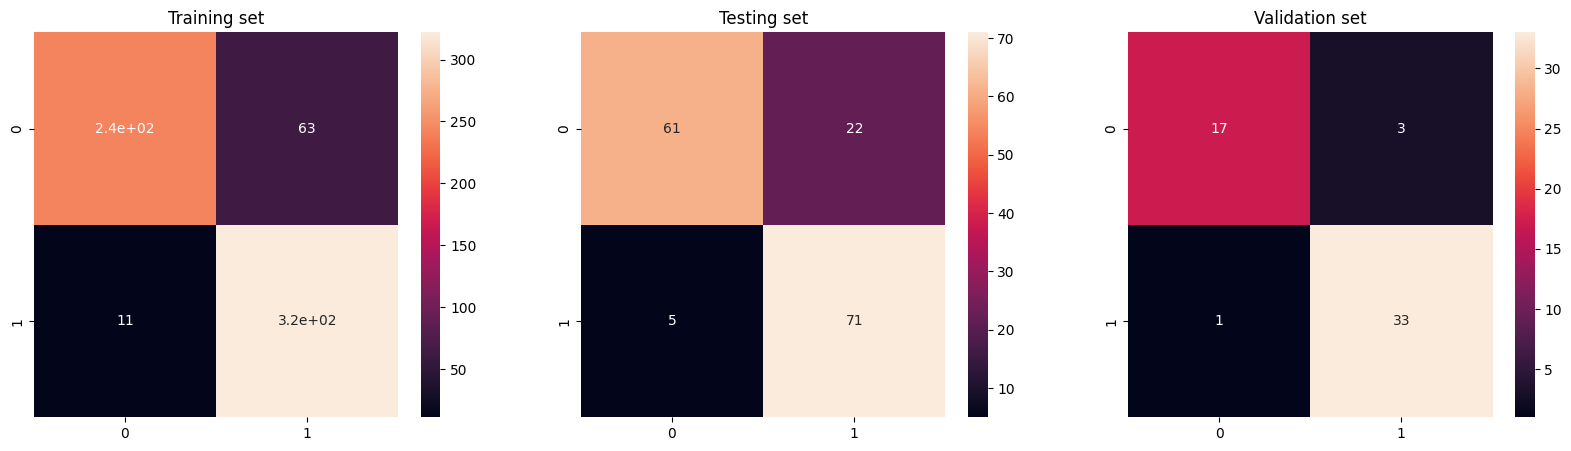

In [44]:

# train model with reduced number of features
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# plot confusion matrices of all three sets and show all in three different plots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].set_title('Training set')
axes[1].set_title('Testing set')
axes[2].set_title('Validation set')

# evaluate model with PCA on training set
y_pred_pca = model.predict(X_train_pca)
print(f"{n} features training accuracy: {accuracy_score(y_train, y_pred_pca)}")
sns.heatmap(confusion_matrix(y_train, y_pred_pca), ax=axes[0], annot=True)
print('\n')

# evaluate model with PCA on testing set
y_pred_pca = model.predict(X_test_pca)
print(f"{n} features testing accuracy: {accuracy_score(y_test, y_pred_pca)}")
sns.heatmap(confusion_matrix(y_test, y_pred_pca), ax=axes[1], annot=True)
print('\n')

# evaluate model with PCA on validation set
y_pred_pca = model.predict(X_val_pca)
print(f"{n} features validation accuracy: {accuracy_score(y_val, y_pred_pca)}")
sns.heatmap(confusion_matrix(y_val, y_pred_pca), ax=axes[2], annot=True)


Since the validation set is what we are most interested in, let's calculate some more metrics for it.

In [45]:
# classification report for the logistic regression model with reduced number of features
print(classification_report(y_val, y_pred_pca))


              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.92      0.97      0.94        34

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



Lastly, let's analyze the model fit with the loss function. Logistic loss function is again a natural choise for this model.

In [46]:
# evaluate model with PCA with logistic loss on the training
y_pred_pca = model.predict_proba(X_train_pca)
print(f"{n} components training loss: {log_loss(y_train, y_pred_pca)}")
print('\n')

# evaluate model with PCA with with logistic loss on the testing
y_pred_pca = model.predict_proba(X_test_pca)
print(f"{n} components testing loss: {log_loss(y_test, y_pred_pca)}")
print('\n')

# evaluate model with PCA with with logistic loss on the validation
y_pred_pca = model.predict_proba(X_val_pca)
print(f"{n} components validation loss: {log_loss(y_val, y_pred_pca)}")


57 components training loss: 0.3670061680126929


57 components testing loss: 0.5039179755503094


57 components validation loss: 0.3315772959052279


# Decision tree with the reduced features

To get some contrast on the results of logistic regression model, let's try another model. Without going very deep on the details, the model is again assessed with accuracy score and loss function (logistic loss) and the results are visualized with confusion matrices. Also, the tree is modelled with a plot.

57 features training accuracy: 0.8450704225352113


57 features testing accuracy: 0.7861635220125787


57 features validation accuracy: 0.8888888888888888


<Axes: title={'center': 'Validation set'}>

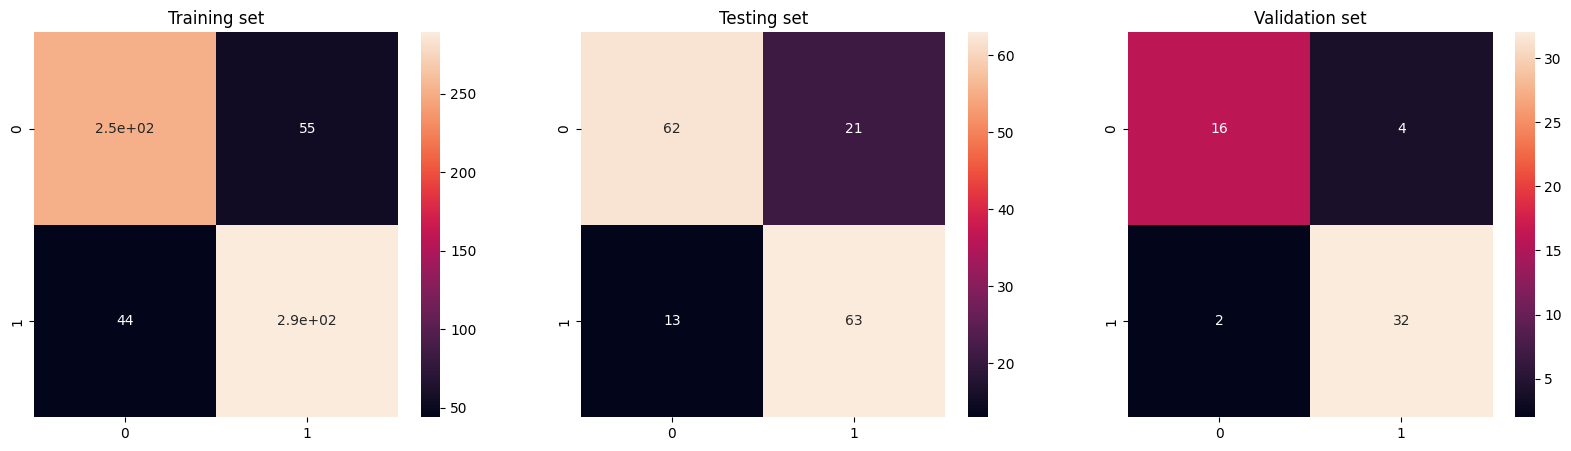

In [47]:
from sklearn.ensemble import RandomForestClassifier

# fit a decision tree model with the reduced number of features
model = RandomForestClassifier(max_depth=2, random_state=10, criterion='log_loss')
model.fit(X_train_pca, y_train)

# set up subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].set_title('Training set')
axes[1].set_title('Testing set')
axes[2].set_title('Validation set')

# evaluate model with PCA on the training set
y_pred_pca = model.predict(X_train_pca)
print(f"{n} features training accuracy: {accuracy_score(y_train, y_pred_pca)}")
sns.heatmap(confusion_matrix(y_train, y_pred_pca), ax=axes[0], annot=True)
print('\n')

# evaluate model with PCA on the testing set
y_pred_pca = model.predict(X_test_pca)
print(f"{n} features testing accuracy: {accuracy_score(y_test, y_pred_pca)}")
sns.heatmap(confusion_matrix(y_test, y_pred_pca), ax=axes[1], annot=True)
print('\n')

# evaluate model with PCA on the validation set
y_pred_pca = model.predict(X_val_pca)
print(f"{n} features validation accuracy: {accuracy_score(y_val, y_pred_pca)}")
sns.heatmap(confusion_matrix(y_val, y_pred_pca), ax=axes[2], annot=True)


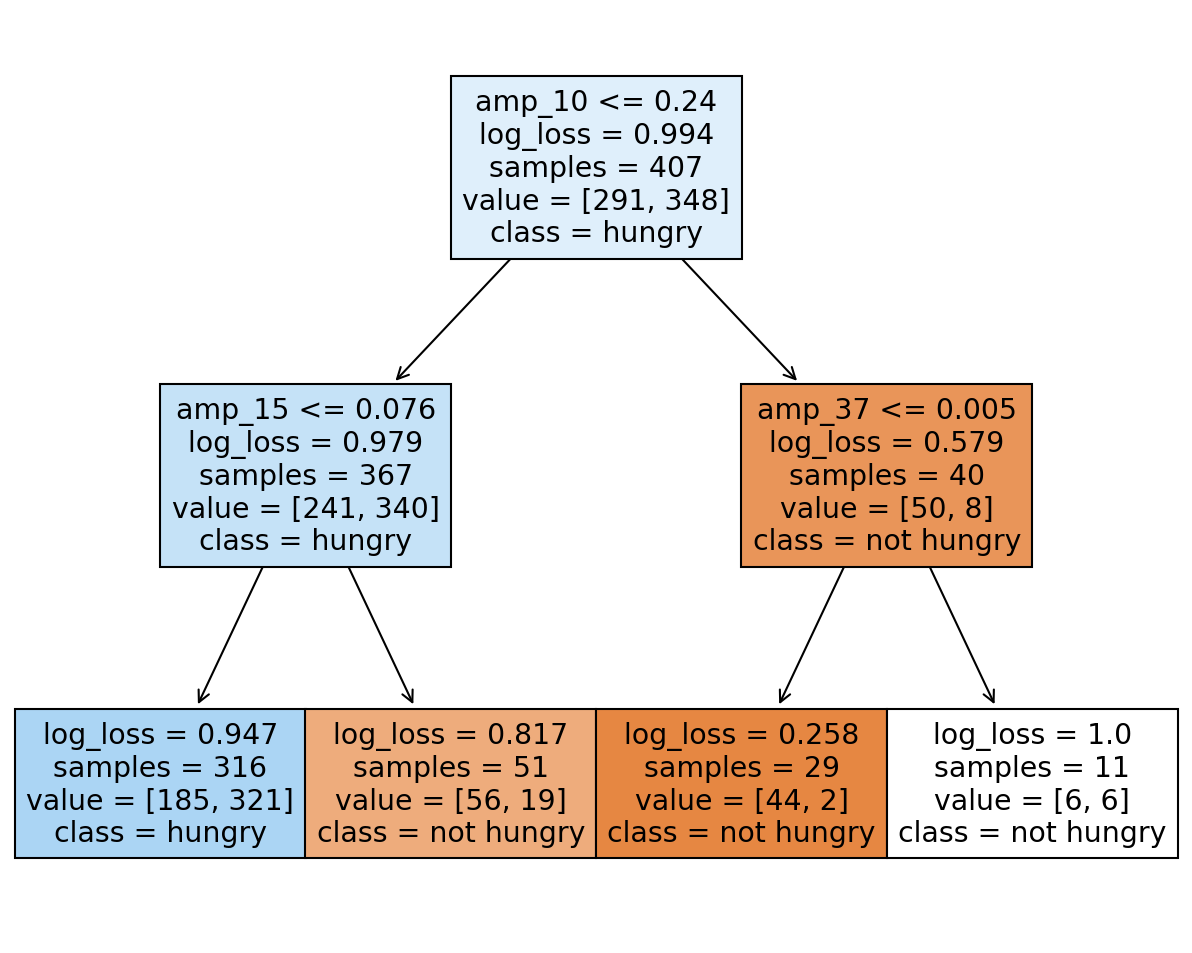

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model.estimators_[0], feature_names=df_data.columns, filled=True, class_names=['not hungry', 'hungry'])
plt.show()


In [49]:
# calculate several metrics for the decision tree
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_pca))


              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.89      0.94      0.91        34

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



In [50]:
# evaluate model with PCA with logistic loss on the training
y_pred_pca = model.predict_proba(X_train_pca)
print(f"{n} components training loss: {log_loss(y_train, y_pred_pca)}")
print('\n')

# evaluate model with PCA with with logistic loss on the testing
y_pred_pca = model.predict_proba(X_test_pca)
print(f"{n} components testing loss: {log_loss(y_test, y_pred_pca)}")
print('\n')

# evaluate model with PCA with with logistic loss on the validation
y_pred_pca = model.predict_proba(X_val_pca)
print(f"{n} components validation loss: {log_loss(y_val, y_pred_pca)}")


57 components training loss: 0.48090826046987306


57 components testing loss: 0.5404655128081157


57 components validation loss: 0.4574062070449361
